In [3]:
#In this notebook I do some EDA. I found myself going back to my wrangling notebook quite a few times over the course of this 
#exploration, to make adjustments as I came to understand my data better.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/Prathmun/Documents/Springboard Jupyter/Capstone 2/DataDataCapstone/derived_data/wrangled_dating_data.csv')
df_ethnicity = pd.read_csv('C:/Users/Prathmun/Documents/Springboard Jupyter/Capstone 2/DataDataCapstone/derived_data/wrangled_ethnicity_data.csv')
df_language = pd.read_csv('C:/Users/Prathmun/Documents/Springboard Jupyter/Capstone 2/DataDataCapstone/derived_data/wrangled_language_data.csv')

In [6]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,job,pets,religion,sign,smokes
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,75.0,transportation,likes dogs and likes cats,agnosticism and very serious about it,just specified,sometimes
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,70.0,hospitality / travel,likes dogs and likes cats,agnosticism but not too serious about it,just specified,no
2,38,available,m,straight,thin,anything,socially,unspecified,graduated from masters program,68.0,rather not say,has cats,unspecified,does not care,no
3,23,single,m,straight,thin,vegetarian,socially,unspecified,working on college/university,71.0,student,likes cats,unspecified,just specified,no
4,29,single,m,straight,athletic,anything,socially,never,graduated from college/university,66.0,artistic / musical / writer,likes dogs and likes cats,unspecified,just specified,no


In [7]:
df.isna().sum()

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
education      0
height         0
job            0
pets           0
religion       0
sign           0
smokes         0
dtype: int64

In [8]:
#This isn't particularly relevant, but felt wrong to not make a .corr() plot at least once.
df.corr()

,age,height
age,1.000000,-0.025128
height,-0.025128,1.000000


(array([ 3787.,     0., 43895.,     0.,     0.,  3040.,     0.,  2231.,
            0.,  1480.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

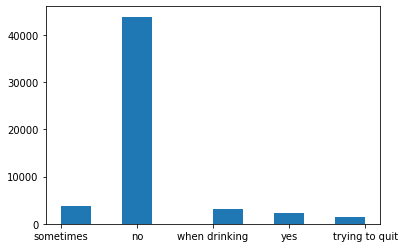

In [9]:
plt.hist(df['smokes'])

(array([ 1600., 11291.,  8509.,  6138., 10542.,  6520.,  5463.,  1721.,
         1947.,   702.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

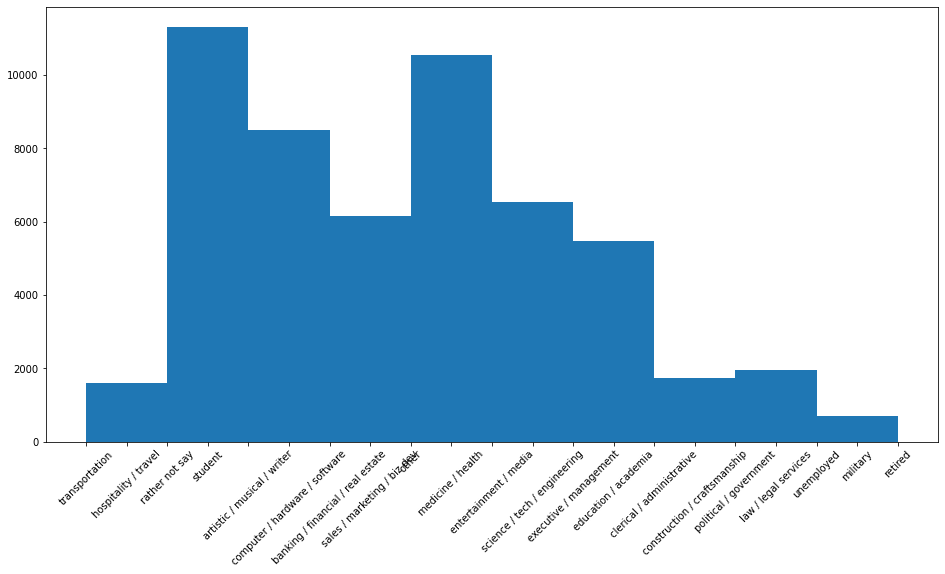

In [10]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.hist(df['job'])

Text(0.5, 1.0, 'sign')

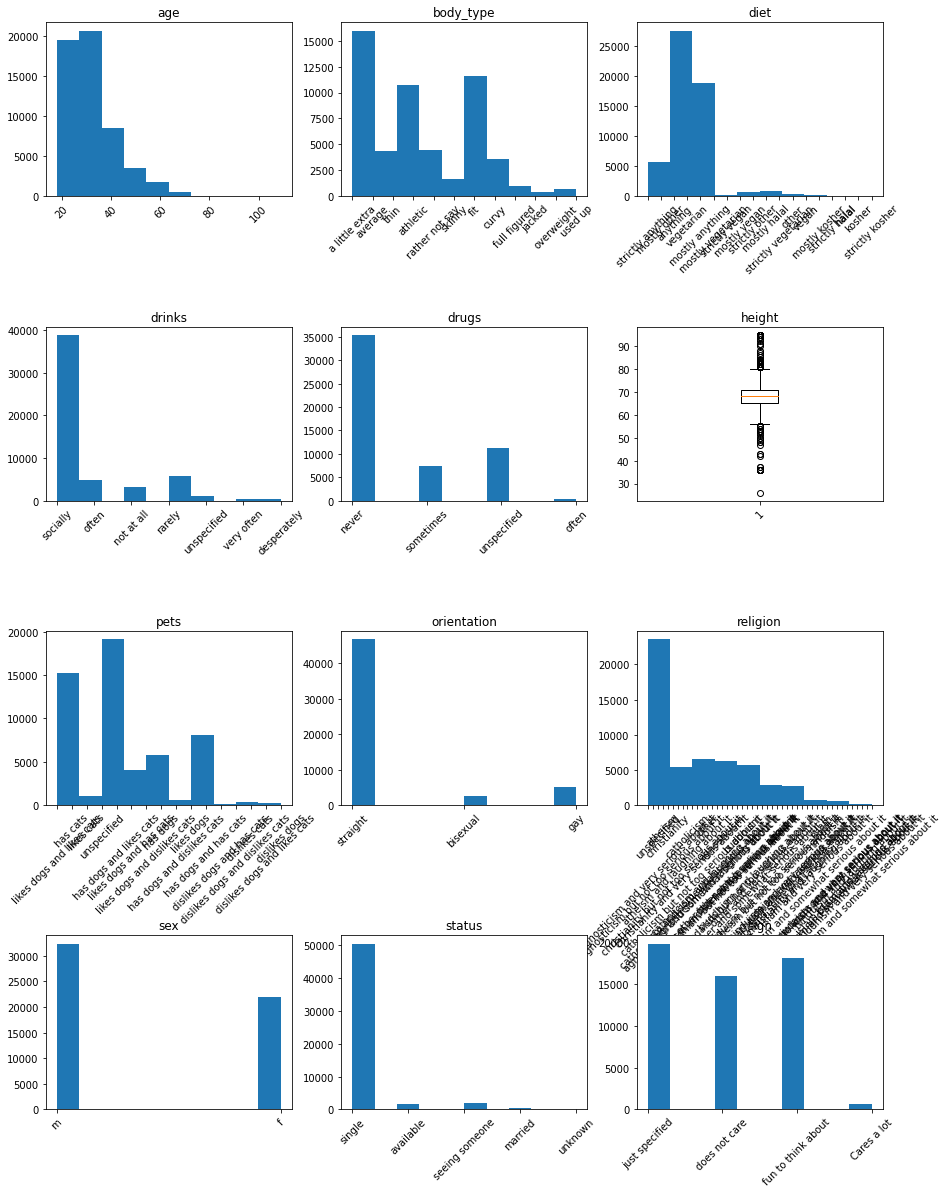

In [42]:
#Simple plotting of our categorical variables. Exploring the distributions. This lead to me simplifying the sign category, and 
#accepting the complexity for other columns like Education and Religion that weren't as easily decomposed while preserving their
#meaning.
fig, axs = plt.subplots(4,3,figsize=(15,20))
plt.subplots_adjust(hspace=.75)

axs[0,0].hist(df.age)
axs[0,0].tick_params(axis='x', rotation=45)
axs[0,0].set_title('age')

axs[0,1].hist(df.body_type)
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].set_title('body_type')

axs[0,2].hist(df.diet)
axs[0,2].tick_params(axis='x', rotation=45)
axs[0,2].set_title('diet')

axs[1,0].hist(df.drinks)
axs[1,0].tick_params(axis='x', rotation=45)
axs[1,0].set_title('drinks')

axs[1,1].hist(df.drugs)
axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].set_title('drugs')

axs[1,2].boxplot(df.height)
axs[1,2].tick_params(axis='x', rotation=45)
axs[1,2].set_title('height')

axs[2,0].hist(df.pets)
axs[2,0].tick_params(axis='x', rotation=45)
axs[2,0].set_title('pets')

axs[2,1].hist(df.orientation)
axs[2,1].tick_params(axis='x', rotation=45)
axs[2,1].set_title('orientation')

axs[2,2].hist(df.religion)
axs[2,2].tick_params(axis='x', rotation=45)
axs[2,2].set_title('religion')

axs[3,0].hist(df.sex)
axs[3,0].tick_params(axis='x', rotation=45)
axs[3,0].set_title('sex')

axs[3,1].hist(df.status)
axs[3,1].tick_params(axis='x', rotation=45)
axs[3,1].set_title('status')

axs[3,2].hist(df.sign)
axs[3,2].tick_params(axis='x', rotation=45)
axs[3,2].set_title('sign')


In [12]:
#That religion category is really crowded, let's take a closer look.
laughing = []
serious = []
other = []
for unique in df.religion.unique():
    if unique.find('laughing') != -1:
        laughing.append(unique)
    elif unique.find('serious') != -1:    
        serious.append(unique)
    else:
        other.append(unique)

In [13]:
print(laughing)

['atheism and laughing about it', 'catholicism and laughing about it', 'agnosticism and laughing about it', 'other and laughing about it', 'buddhism and laughing about it', 'judaism and laughing about it', 'christianity and laughing about it', 'hinduism and laughing about it', 'islam and laughing about it']


In [14]:
print(serious)

['agnosticism and very serious about it', 'agnosticism but not too serious about it', 'christianity but not too serious about it', 'christianity and very serious about it', 'catholicism but not too serious about it', 'catholicism and somewhat serious about it', 'agnosticism and somewhat serious about it', 'atheism and somewhat serious about it', 'buddhism but not too serious about it', 'other but not too serious about it', 'judaism but not too serious about it', 'other and somewhat serious about it', 'other and very serious about it', 'hinduism but not too serious about it', 'atheism but not too serious about it', 'christianity and somewhat serious about it', 'hinduism and very serious about it', 'atheism and very serious about it', 'buddhism and somewhat serious about it', 'islam and very serious about it', 'judaism and somewhat serious about it', 'catholicism and very serious about it', 'judaism and very serious about it', 'hinduism and somewhat serious about it', 'islam but not too 

In [15]:
very = []
notserious = []
somewhat = []

for each in serious:
    if each.find('very') != -1:
        very.append(each)
    elif each.find('not') != -1:
        notserious.append(each)
    else:
        somewhat.append(each)
print(very)
print('SPACER')
print(notserious)
print('SPACER')
print(somewhat)



['agnosticism and very serious about it', 'christianity and very serious about it', 'other and very serious about it', 'hinduism and very serious about it', 'atheism and very serious about it', 'islam and very serious about it', 'catholicism and very serious about it', 'judaism and very serious about it', 'buddhism and very serious about it']
SPACER
['agnosticism but not too serious about it', 'christianity but not too serious about it', 'catholicism but not too serious about it', 'buddhism but not too serious about it', 'other but not too serious about it', 'judaism but not too serious about it', 'hinduism but not too serious about it', 'atheism but not too serious about it', 'islam but not too serious about it']
SPACER
['catholicism and somewhat serious about it', 'agnosticism and somewhat serious about it', 'atheism and somewhat serious about it', 'other and somewhat serious about it', 'christianity and somewhat serious about it', 'buddhism and somewhat serious about it', 'judaism a

In [16]:
print(other)

['unspecified', 'atheism', 'christianity', 'catholicism', 'other', 'agnosticism', 'buddhism', 'judaism', 'islam', 'hinduism']


In [17]:
#so we have seven religions plus an other and unspecified, and for each religion we have four levels of seirousness. 
#Laughing, Not very, Vanilla, and Very. THere's a lot of density here, and I've got an impulse to simplifiy, but we have a 
#decent number of members in every category. We'll see if the modelling stage applies pressure for us to simplify this at all.
#But for now we'll leave it

In [18]:
#The education category is very crowded as well. Let's take a deeper look at it
graduated = []
working_on = []
dropped_out = []
other = []
for unique in df.education.unique():
    if unique.find('graduated') != -1:
        graduated.append(unique)
    elif unique.find('dropped') != -1:
        dropped_out.append(unique)
    elif unique.find('working') != -1:
        working_on.append(unique)
    else:
        other.append(unique)

print(graduated)
print(len(graduated))
print('SPACER')
print(working_on)
print(len(working_on))
print('SPACER')
print(dropped_out)
print(len(dropped_out))
print('SPACER')
print(other)
print(len(other))

['graduated from masters program', 'graduated from college/university', 'graduated from high school', 'graduated from space camp', 'graduated from ph.d program', 'graduated from law school', 'graduated from two-year college', 'graduated from med school']
8
SPACER
['working on college/university', 'working on space camp', 'working on two-year college', 'working on masters program', 'working on ph.d program', 'working on med school', 'working on high school', 'working on law school']
8
SPACER
['dropped out of space camp', 'dropped out of college/university', 'dropped out of high school', 'dropped out of ph.d program', 'dropped out of two-year college', 'dropped out of masters program', 'dropped out of med school', 'dropped out of law school']
8
SPACER
['unspecified', 'college/university', 'two-year college', 'high school', 'law school', 'masters program', 'space camp', 'ph.d program', 'med school']
9


In [19]:
#Eight caetgories, with four levels a piece, and one for unspecified. 
#about half of our data is contained iwthin the first four categories ['graduated from college/university', 
#'graduated form masters program', 'working on college/university', 'unspecified']
#Might want to prune this later, but as it stands it's hard to justify cutting out what could be meaningful distinctions

In [96]:
def category_smoker_compare(colname, dataframe):
    list_of_jobs = list(dataframe[colname].unique())
    employed_smokers = pd.DataFrame()
    for i in list_of_jobs:
        employed_smokers[i] = np.nan
    job_smoke_dict = {}
    for x in dataframe.index:
        if dataframe[colname].get(x) not in job_smoke_dict.keys():
            job_smoke_dict[dataframe[colname].get(x)] = []
        job_smoke_dict[dataframe[colname].get(x)].append(dataframe['smokes'].get(x))
    
    employed_smokers = pd.DataFrame.from_dict(job_smoke_dict, orient='index').transpose()
    
    
    
    smoking_jobs =pd.DataFrame(columns=dataframe['smokes'].unique())

    for column in employed_smokers.columns:
        dicto = employed_smokers[column].value_counts(normalize=True)
        smoking_jobs = smoking_jobs.append(dicto)
    return smoking_jobs.sort_values('no', axis=0)


In [97]:
def category_smoker_display(dataframe, size=(15,8)):
    plt.figure(figsize=(15,8))
    plt.bar(dataframe.index,dataframe['no'])
    plt.xticks(rotation = 45, ha='right')
    plt.show

In [101]:
education_smoker_df = category_smoker_compare('education', df)

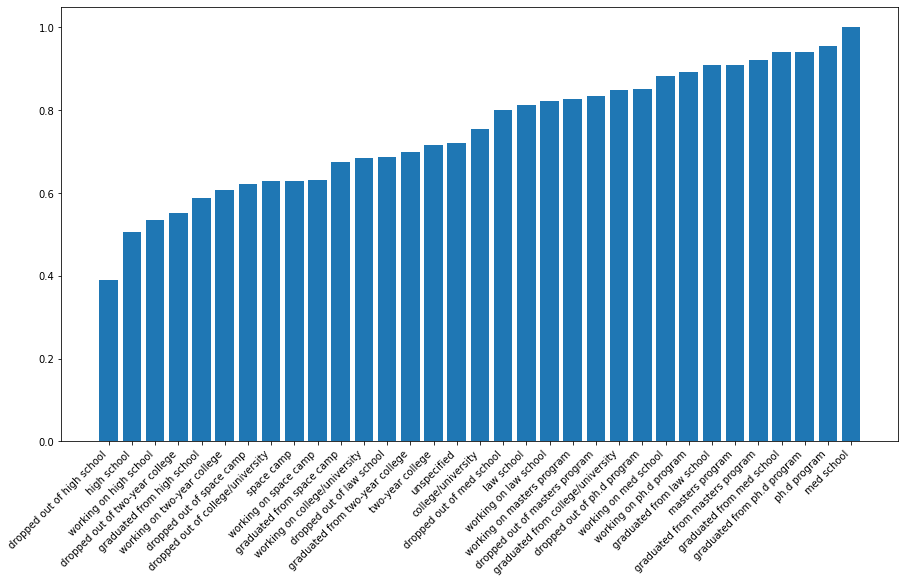

In [102]:
category_smoker_display(education_smoker_df)

<function matplotlib.pyplot.show(close=None, block=None)>

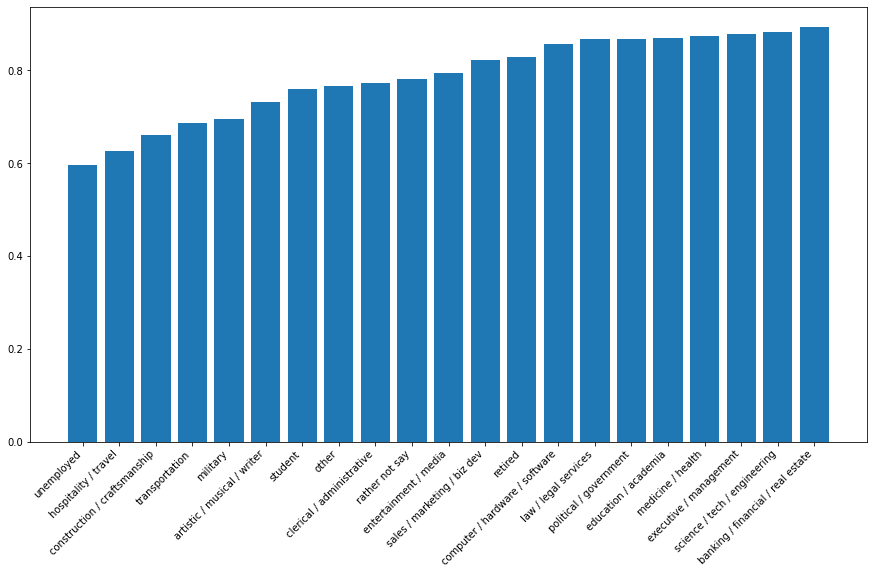

In [78]:
plt.figure(figsize=(15,8))
plt.bar(smoker_test_df.index,smoking_jobs['no'])
plt.xticks(rotation = 45, ha='right')
plt.show

In [20]:
print(df['smokes'].unique())

['sometimes' 'no' 'when drinking' 'yes' 'trying to quit']


In [21]:
list_of_jobs = list(df['job'].unique())
employed_smokers = pd.DataFrame()
for i in list_of_jobs:
    employed_smokers[i] = np.nan

In [22]:
employed_smokers.head()

,transportation,hospitality / travel,rather not say,student,artistic / musical / writer,computer / hardware / software,banking / financial / real estate,sales / marketing / biz dev,other,medicine / health,...,science / tech / engineering,executive / management,education / academia,clerical / administrative,construction / craftsmanship,political / government,law / legal services,unemployed,military,retired


In [23]:
job_smoke_dict = {}
for x in df.index:
    if df['job'].get(x) not in job_smoke_dict.keys():
        job_smoke_dict[df['job'].get(x)] = []
    job_smoke_dict[df['job'].get(x)].append(df['smokes'].get(x))

In [24]:
employed_smokers = pd.DataFrame.from_dict(job_smoke_dict, orient='index').transpose()

In [25]:
employed_smokers.head()

,transportation,hospitality / travel,rather not say,student,artistic / musical / writer,computer / hardware / software,banking / financial / real estate,sales / marketing / biz dev,other,medicine / health,...,science / tech / engineering,executive / management,education / academia,clerical / administrative,construction / craftsmanship,political / government,law / legal services,unemployed,military,retired
0,sometimes,no,no,no,no,no,no,no,no,no,...,no,no,no,trying to quit,no,no,no,no,no,no
1,no,no,when drinking,no,no,no,no,no,no,no,...,no,no,sometimes,no,no,no,no,no,no,trying to quit
2,no,no,yes,no,sometimes,no,no,no,no,no,...,when drinking,no,no,no,no,no,no,yes,trying to quit,no
3,no,no,no,no,no,no,trying to quit,no,trying to quit,no,...,no,no,no,no,no,sometimes,no,no,no,no
4,sometimes,no,no,sometimes,no,no,no,yes,no,sometimes,...,no,no,no,no,no,no,no,no,no,no


In [26]:
smoking_jobs =pd.DataFrame(columns=df['smokes'].unique())

for column in employed_smokers.columns:
    dicto = employed_smokers[column].value_counts(normalize=True)
    smoking_jobs = smoking_jobs.append(dicto)
smoking_jobs.sort_values('no', axis=0, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

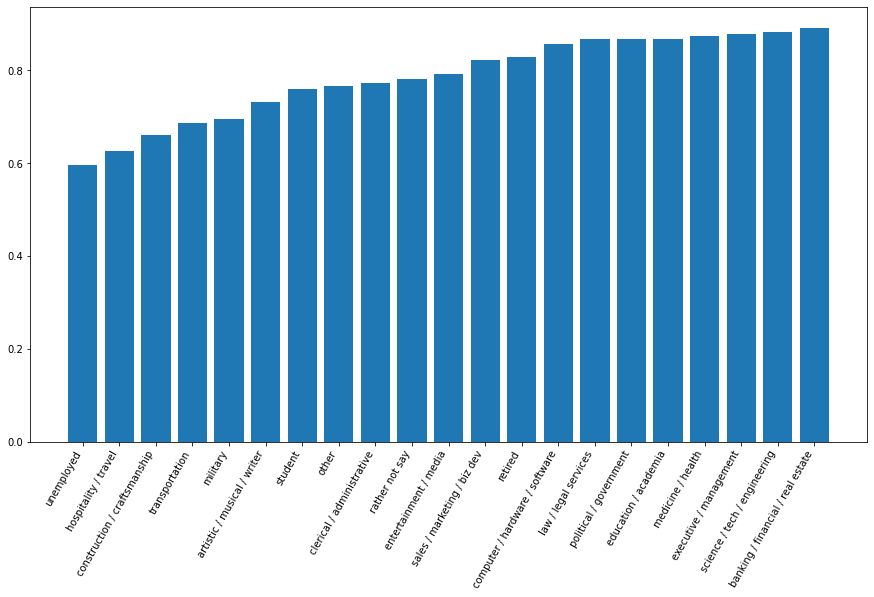

In [32]:
plt.figure(figsize=(15,8))
plt.bar(smoking_jobs.index,smoking_jobs['no'])
plt.xticks(rotation = 60, ha='right')
plt.show

In [33]:
edu_smoke_dict = {}
for x in df.index:
    if df['education'].get(x) not in edu_smoke_dict.keys():
        edu_smoke_dict[df['education'].get(x)] = []
    edu_smoke_dict[df['education'].get(x)].append(df['smokes'].get(x))

In [34]:
edu_smoke_dict

{'working on college/university': ['sometimes',
  'no',
  'no',
  'no',
  'no',
  'trying to quit',
  'trying to quit',
  'no',
  'no',
  'when drinking',
  'sometimes',
  'no',
  'no',
  'sometimes',
  'no',
  'no',
  'when drinking',
  'no',
  'when drinking',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'sometimes',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'trying to quit',
  'no',
  'no',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'no',
  'no',
  'trying to quit',
  'no',
  'no',
  'no',
  'sometimes',
  'sometimes',
  'no',
  'no',
  'no',
  'no',
  'no',
  'no',
  'trying to quit',
  'no',
  'no',
  'no',
  'no',
  'sometimes',
  'no',
  'sometimes',
  'no',
  'no',
  'no',
  'sometimes',
  'no',
  'sometimes',
  'no',
  'trying to quit',
  'no',
  'no',
  'yes',
  'yes',
  'no',
  'no',
  'no',
  'sometimes',
  'no',
  'trying to quit',
  'yes',
  'sometimes',
  'yes',
  'no',
  'no',
  'no',
  'when 

In [35]:
smoking_edu =pd.DataFrame(columns=df['smokes'].unique())

In [36]:
list_of_jobs = list(df['job'].unique())
educated_smokers = pd.DataFrame()
for i in list_of_jobs:
    educated_smokers[i] = np.nan


In [37]:
educated_smokers = pd.DataFrame.from_dict(edu_smoke_dict, orient='index').transpose()

In [38]:
educated_smokers.head()

,working on college/university,working on space camp,graduated from masters program,graduated from college/university,working on two-year college,unspecified,graduated from high school,working on masters program,graduated from space camp,dropped out of space camp,...,graduated from med school,working on law school,law school,masters program,space camp,dropped out of masters program,ph.d program,dropped out of med school,dropped out of law school,med school
0,sometimes,no,no,no,no,yes,no,sometimes,no,no,...,no,no,no,no,sometimes,no,no,no,no,no
1,no,no,no,no,no,no,no,sometimes,no,no,...,no,no,when drinking,sometimes,when drinking,no,no,no,no,no
2,no,no,no,no,no,no,sometimes,no,trying to quit,trying to quit,...,no,no,no,no,no,no,no,no,no,no
3,no,sometimes,no,when drinking,sometimes,no,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,no
4,no,trying to quit,no,no,no,sometimes,yes,no,sometimes,no,...,no,yes,no,no,no,no,no,no,no,no


In [39]:
smoking_edus =pd.DataFrame(columns=df['smokes'].unique())

for column in educated_smokers.columns:
    dicto = educated_smokers[column].value_counts(normalize=True)
    smoking_edus = smoking_edus.append(dicto)
smoking_edus.sort_values('no', axis=0, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

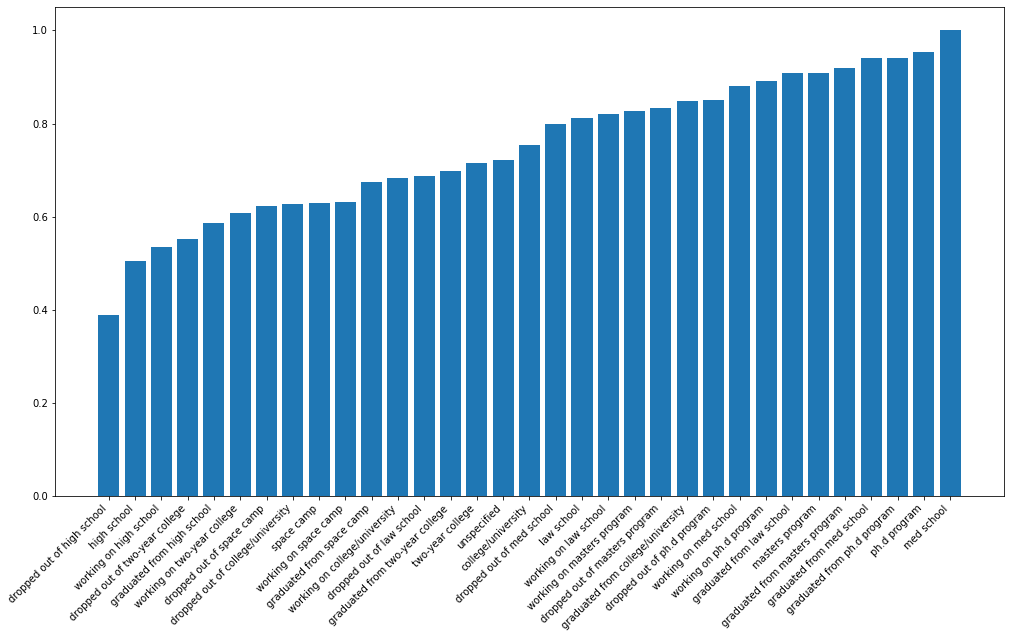

In [40]:
plt.figure(figsize=(17,9))
plt.bar(smoking_edus.index,smoking_edus['no'])
plt.xticks(rotation = 45, ha='right')
plt.show

### GOTTA CLEAN UP THE EDU EDA, USE ABOVE GRAPH ISNTEAD. GRAP

In [28]:
df.education.unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       'unspecified', 'graduated from high school',
       'working on masters program', 'graduated from space camp',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'college/university', 'two-year college', 'working on med school',
       'dropped out of college/university',
       'graduated from two-year college', 'dropped out of high school',
       'working on high school', 'dropped out of ph.d program',
       'dropped out of two-year college', 'high school',
       'graduated from med school', 'working on law school', 'law school',
       'masters program', 'space camp', 'dropped out of masters program',
       'ph.d program', 'dropped out of med school',
       'dropped out of law school', 'med school'], dtype=ob

In [1]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=50)
plt.hist(df.education, bins=len(df.education.unique()))
plt.show()

NameError: name 'plt' is not defined

In [30]:
#Our two biggest categories of education have almost identical relationships with smoking. Which is interesting.

In [31]:
education_smoke_dict = {}
for x in df.index:
    if df['education'].get(x) not in education_smoke_dict.keys():
        education_smoke_dict[df['education'].get(x)] = []
    education_smoke_dict[df['education'].get(x)].append(df['smokes'].get(x))

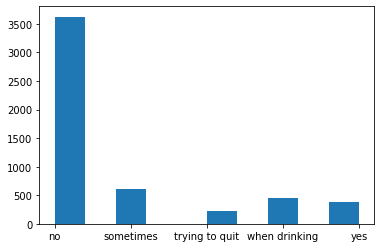

In [32]:
plt.hist(sorted(education_smoke_dict['working on college/university']))
plt.show()

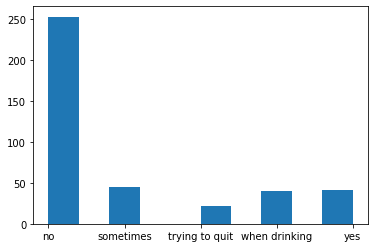

In [33]:
plt.hist(sorted(education_smoke_dict['working on space camp']))
plt.show()

In [34]:
#The below was useful for me, but produces about nine pages of graphs, and I'll save you the trouble of scrolling throuhg that.

#Every single language category has at least a few fluents. I'm tempted to group some languages to reduce dimensionality,
#but given that almost all of these are real langauges, the only really debatable item being c++ it seems imprudent to 
#remove them from the feature set.


#print(len(df_language.columns))
#fig, axs = plt.subplots(26,3,figsize=(12,200))
#plt.subplots_adjust(hspace=1)
#axrow =0
#axcolumn = 0


#for col_name in df_language.columns:
#    non_zero_mask = df_language[col_name] > 0
#    axs[axrow, axcolumn].hist(df_language.loc[non_zero_mask, col_name])
#    axs[axrow, axcolumn].set_title(col_name)
#    axcolumn += 1
#    if axcolumn > 2:
#        axcolumn = 0
#        axrow += 1

In [35]:
#Most of our speakers speak english fluently.
print(df_language['english'].value_counts())

3    58230
2     1067
1      599
0       50
Name: english, dtype: int64


In [36]:
print(df_language.shape)

(59946, 77)


In [37]:
multifluent_score = pd.Series(df_language.apply(np.sum, axis=1))

In [38]:
#Each language had three fluency options, barely, mostly, and fluent, translated to 1,2 and 3 respectively.
#It's remarkable to me that nearly half of the people in our data have a sore of 9!
multifluent_score.value_counts()

3     28855
6      8684
5      7126
4      5632
7      2917
8      2169
9      1951
10      697
12      454
11      397
2       376
1       315
13      123
15      113
14       72
0        50
16        7
18        7
17        1
dtype: int64

In [39]:
#upon closer examination it looks like ~75% of folks in this data speak only one langauge fluently, which is more what I would
#expect from americans
fluency_score = pd.Series(df_language[df_language > 2].apply(np.sum, axis=1))
fluency_score = fluency_score/3
fluency_score.value_counts()

1.0    46333
2.0    10343
3.0     1647
0.0     1138
4.0      363
5.0      115
6.0        7
dtype: int64

In [40]:
#This shows us that about 1500 of our speakers who only speak one language fluently, also claim to speak at least one other 
#at any fluency.
num_spoken = pd.Series(df_language.astype(bool).apply(np.sum, axis=1))
num_spoken.value_counts()

1    29299
2    17123
3     8610
4     3233
5     1553
6       78
0       50
dtype: int64

In [41]:
df_language['fluency_score'] = fluency_score
df_language['multifluent_score'] = multifluent_score
df_language['num_spoken'] = num_spoken

In [42]:
df_language_num1to2 = df_language[df_language.num_spoken <= 2]

In [43]:
df_language_numpast2 = df_language[df_language.num_spoken > 2]

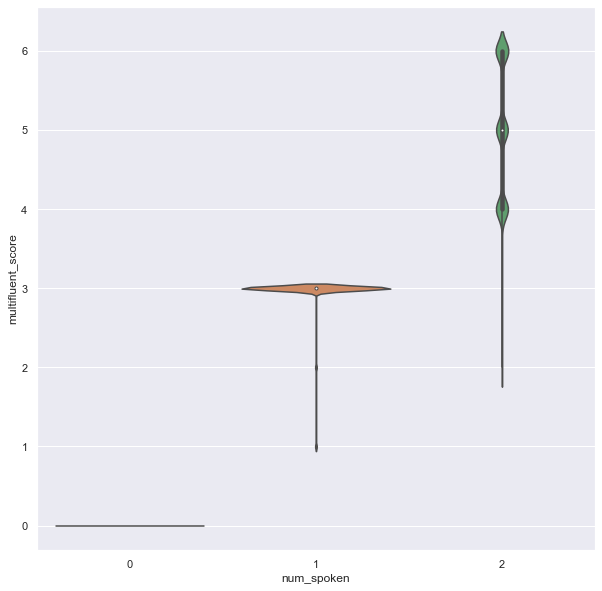

In [44]:
sns.set(rc={'figure.figsize':(10,10)})
sns.violinplot(x='num_spoken', y='multifluent_score', data=df_language_num1to2)
plt.show()

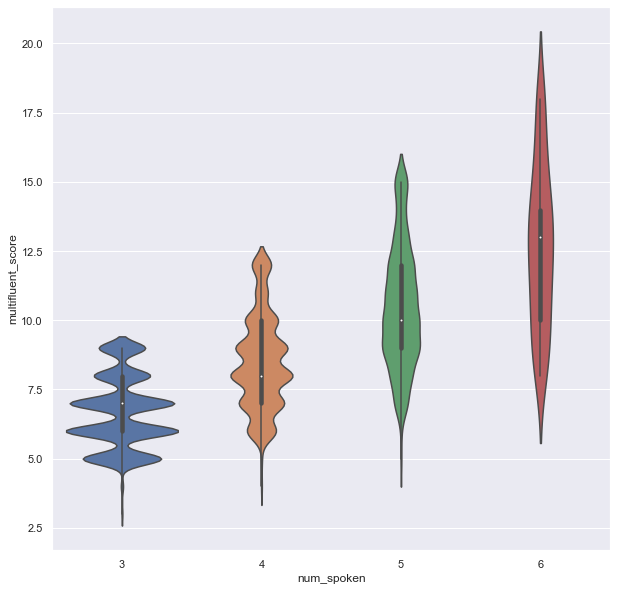

In [45]:
sns.set(rc={'figure.figsize':(10,10)})
sns.violinplot(x='num_spoken', y='multifluent_score', data=df_language_numpast2)
plt.show()

In [46]:
#The above graphs show us an interesting thing. Firstly as the number of languages claimed goes up so does the vairance
#in the multifluency score. Which suggests that as people go about learning more languages, they tend record more partial fluency
#then those monolingual individuals. Another interpretation might be that as one learns more languages they tend to acquire
#more partial fluency. Intuitive once seen, but I didn't expect it.

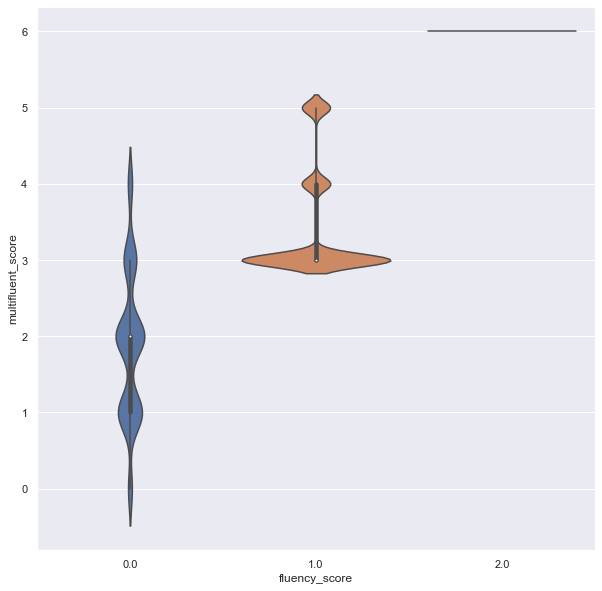

In [47]:
sns.set(rc={'figure.figsize':(10,10)})
sns.violinplot(x='fluency_score', y='multifluent_score', data=df_language_num1to2)
plt.show()

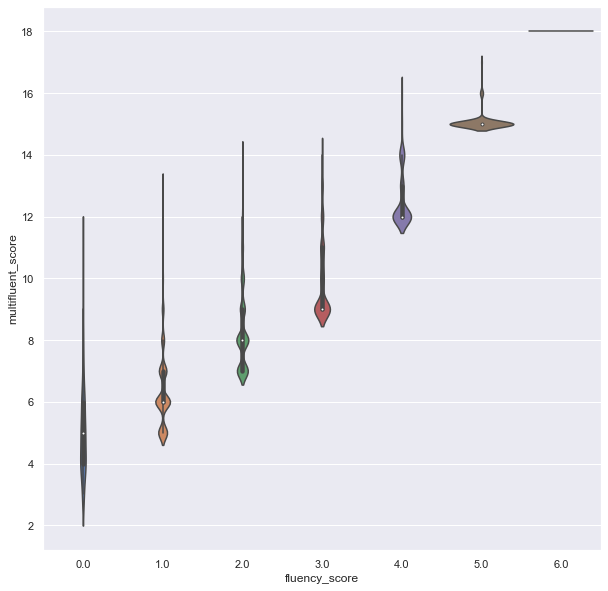

In [48]:
sns.set(rc={'figure.figsize':(10,10)})
sns.violinplot(x='fluency_score', y='multifluent_score', data=df_language_numpast2)
plt.show()

In [49]:
#I'm surprised to find that there are so many people who claim complete fluency in NO languages, but claim partial fluency in 
#quite a few others at the same time. Some weird reporting going on here.

#It also appears as the number of languages spoken fluently goes up, the variance in multifluency score goes down markedly.

In [50]:
df_ethnicity.head()

,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0


In [51]:
df_ethnicity.sum(axis=0)

asian                8205
white               37882
black                3328
other                3567
hispanic / latin     5357
pacific islander     1473
native american      1265
middle eastern        950
indian               1449
dtype: int64

In [52]:
df_ethnicity['ethnicity_multiplicity'] = df_ethnicity.apply(np.sum, axis=1)

In [53]:
df_ethnicity.head()

,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian,ethnicity_multiplicity
0,1,1,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1
4,1,0,1,1,0,0,0,0,0,3


In [54]:
df_ethnicity.ethnicity_multiplicity.value_counts()

1    47407
0     5680
2     5412
3     1050
4      234
9       66
5       55
6       18
8       14
7       10
Name: ethnicity_multiplicity, dtype: int64

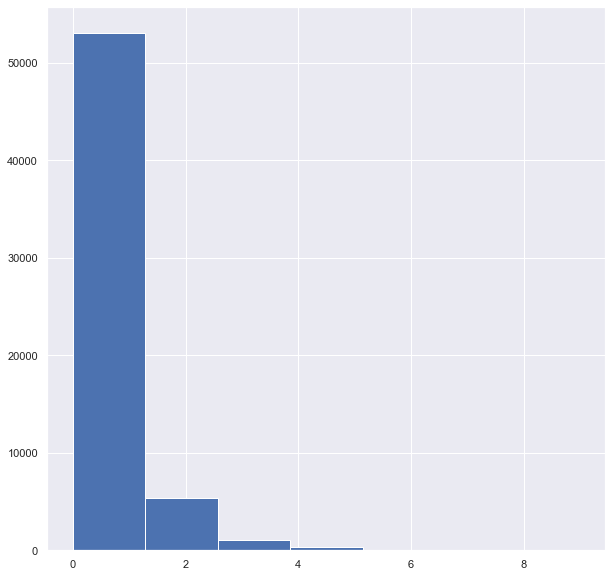

In [55]:
plt.hist(df_ethnicity.ethnicity_multiplicity, bins=7)
plt.show()

In [56]:
#It would appear that Just about everyone claims one ethnicity, and the number of people who claim multiple drops off rapidly as
#the multiplicity raises.

In [57]:
import pandas as pd
import os
import pickle
    
    
# This utility was created because students were getting confused when they ran 
# their notebooks twice, the previous write-to-file code would do nothing and say  
# nothing. The students thought the file was over-written when in fact, it was not -
# generating hidden bugs in subsequent notebooks.

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
        
        
        
        
        
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)
            

In [58]:
save_file(df_language, 'wrangled_language_data.csv', 'derived_data')
save_file(df_ethnicity, 'wrangled_ethnicity_data.csv', 'derived_data')


A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "derived_data\wrangled_language_data.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "derived_data\wrangled_ethnicity_data.csv"
